In [1]:

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import time
import pygame
from Joueur import Joueur
from Plateau import Plateau 
import numpy as np
import tensorflow as tf
from tensorflow import keras
class Game(pygame.sprite.Sprite):
    
    def __init__(self,final_time=2000):
        self.final_time = final_time
        global size, rows
        self.size = 600
        size = self.size
        self.time_step = 0
        
        
        self.rows = 4
        rows = self.rows
        self.taille = 4
        self.plateau = Plateau(taille = self.taille,\
                  position_depart_joueur = (25,35),nombre_rewards=1)
        self.player = self.plateau.player
        
        

        
   


     
    def grid(self,window,size,rows):
        distance_row = size //rows
        x=0
        y=0
        for l in range(rows):
            x+=distance_row
            y+=distance_row
            pygame.draw.line(self.window,(255,255,255),(x,0),(x,size))
            pygame.draw.line(self.window, (255, 255, 255), (0, y), (size, y))
        pygame.display.flip()
        
    def render(self,playing_mode='human'):
        plateau = self.plateau
        player = self.player
        self.window = pygame.display.set_mode((size,size))
        pygame.display.set_caption("Petit jeu")
        
        if playing_mode == 'human':
            running = True
            while running:
                self.grid(self.window, self.size, self.rows)
                self.window.fill((0, 0, 0))
                self.window.blit(player.image, player.rect)
                [self.window.blit(plateau.rewards[i].image_rew,plateau.rewards[i].rect_rew)  for i in range(plateau.nombre_rewards)]
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        running = False
                        pygame.quit()
                    elif event.type == pygame.KEYDOWN:
                        if event.key == pygame.K_RIGHT:
                            player.action('droite',size)
                        elif event.key == pygame.K_LEFT:
                            player.action('gauche', size)
                        elif event.key == pygame.K_DOWN:
                            player.action('bas', size)
                        elif event.key == pygame.K_UP:
                            player.action('haut', size)
        else:
            self.grid(self.window, self.size, self.rows)
            self.window.fill((0, 0, 0))
            self.window.blit(player.image, player.rect)
            [self.window.blit(plateau.rewards[i].image_rew,plateau.rewards[i].rect_rew)  for i in range(plateau.nombre_rewards)]
            
                        
    
    def reset(self):
        self.size = 600
        size = self.size
        self.time_step = 0
        
        self.rows = 4
        rows = self.rows
        self.taille = 4
        self.plateau = Plateau(taille = self.taille,\
                  position_depart_joueur = (25,35),nombre_rewards=1)
        self.player = self.plateau.player
        self.pos_rew = np.array([rew.position_rewards for rew in self.plateau.rewards]).flatten()
        
        self.pos_player=np.array([self.player.pos_x,self.player.pos_y]).flatten()
        
        obs = np.concatenate([self.pos_player,self.pos_rew])
        return obs
    
    def get_obs(self):
        self.pos_rew = np.array([rew.position_rewards for rew in self.plateau.rewards]).flatten()
        self.pos_player=np.array([self.player.pos_x,self.player.pos_y]).flatten()
        obs = np.concatenate([self.pos_player,self.pos_rew])
        return obs
        
    
    def step(self,action):
        #les actions sont des entiers entre 0 et 3
        act = {'0':'gauche','1':'droite','2':'haut','3':'bas'}
        real_action = act[str(action)]
        reward = self.player.action(real_action,self.size)
        obs = self.get_obs()
        done = self.player.done
        info = {'action': real_action}
        return obs, reward, done, info
        
   
        




















ModuleNotFoundError: No module named 'pygame'

In [4]:

game = Game()



In [62]:
###Corriger classe player
import time


import numpy as np
import tensorflow as tf
from tensorflow import keras
class easier_impl():
    
    def __init__(self,taille_matrice,value_reward, time_condition):
        
        self.taille = taille_matrice
        self.matrice = np.zeros((self.taille,self.taille))
        self.pos_player = tuple(np.random.randint(0,self.taille,size=2))
        self.matrice[self.pos_player]=1
        self.pos_reward = tuple(np.random.randint(0,self.taille,size=2))
        while self.pos_reward == self.pos_player:
            self.pos_reward = tuple(np.random.randint(0,self.taille,size=2))
        self.matrice[self.pos_reward]=2
        self.value_reward = value_reward
        self.step_reward=0
        self.total_rewards = 0
        self.done = False
        self.time_step = 0
        self.time_condition = time_condition
        self.init = {'taille':taille_matrice,
                     'value_reward':value_reward,
                     'time_condition':time_condition,
                     'pos_reward':self.pos_reward,
                    'pos_player':self.pos_player}
    
    
    def move_to(self,entier):
        ##entier entre 0 et 3
        y,x=self.pos_player
        w,z=self.pos_reward
        taille = self.taille
        self.time_step+=1
        bool1,bool2,bool3,bool4=(y!=0),(y!=taille-1),(x!=0),(x!=taille-1)
        if entier==0:
            #haut
            if bool1:
                #on peut aller en haut
                self.matrice[y,x]=0
                self.pos_player=(y-1,x)
                self.check_reward(self.pos_player)
                self.matrice[self.pos_player]=1
            else:
                self.total_rewards-=2
                self.step_reward=-2
        elif entier==1:
            if bool2:
                #on peut aller en bas
                self.matrice[y,x]=0
                self.pos_player=(y+1,x)
                self.check_reward(self.pos_player)
                self.matrice[self.pos_player]=1
            else:
                self.total_rewards-=2
                self.step_reward=-2
                #bas
        elif entier==2:
            if bool3:
                #on peut aller a gauche
                self.matrice[y,x]=0
                self.pos_player=(y,x-1)
                self.check_reward(self.pos_player)
                self.matrice[self.pos_player]=1
            else:
                self.total_rewards-=2
                self.step_reward=-2
            #gauche
        elif entier==3:
            if bool4:
                self.matrice[y,x]=0
                self.pos_player=(y,x+1)
                self.check_reward(self.pos_player)
                self.matrice[self.pos_player]=1
            else:
                self.total_rewards-=2
                self.step_reward=-2
        
            
        done = self.is_done()
        obs = np.concatenate([np.array(self.pos_player),np.array(self.pos_reward)])
        reward = self.step_reward
        act = {'0':'haut','1':'bas','2':'gauche','3':'droite'}
        action_took = act[str(entier)]
        info = {'action':action_took}
        return obs,reward,done,info
    
        
        
        
            #droite
        
            
        
    def check_reward(self,pos_player):
        rew_pos = self.pos_reward
        if pos_player==rew_pos:
            self.total_rewards+=self.value_reward
            self.step_reward = self.value_reward
            self.matrice[rew_pos]=0
            new_pos = tuple(np.random.randint(0,self.taille,size=2))
            while new_pos==pos_player:
                new_pos = tuple(np.random.randint(0,self.taille,size=2))
            self.pos_reward =new_pos
            self.matrice[new_pos]=2
        else:
            self.step_reward = -1
    
    def is_done(self):
        t = self.time_step
        time_condition = self.time_condition
        done = (t == self.time_condition)
        return  done
    
    def reset(self):
        init = self.init 
        self.taille = init['taille']
        self.matrice = np.zeros((self.taille,self.taille))
        self.pos_player = init['pos_player']
        self.matrice[self.pos_player]=1
        self.pos_reward = tuple(np.random.randint(0,self.taille,size=2))
        while self.pos_reward == self.pos_player:
            self.pos_reward = tuple(np.random.randint(0,self.taille,size=2))
        self.matrice[self.pos_reward]=2
        self.value_reward = init['value_reward']
        self.step_reward=0
        self.total_rewards = 0
        self.done = False
        self.time_step = 0
        self.time_condition = init['time_condition']
        
        obs = np.concatenate([np.array(self.pos_player),np.array(self.pos_reward)])

        
        return obs

    
         
    def distance(self):
        
        pos_player=np.array(self.pos_player)
        pos_reward = np.array(self.pos_reward)
        
        return np.linalg.norm(pos_reward-pos_player)
    
    
            
        
    
    

In [5]:
np.linalg.norm([1,1])

1.4142135623730951

array([3, 4, 4, 1])

56

In [10]:
np.array(jeu.pos_player)

array([3, 4])

In [63]:
jeu = easier_impl(taille_matrice=5,value_reward=40,time_condition=10)

In [18]:
jeu.reset()

array([0, 2, 1, 2])

In [88]:
a = jeu.pos_player
b = jeu.pos_reward

In [99]:
np.concatenate([np.array(a),np.array(b),np.array([jeu.distance()])])


array([2., 1., 1., 1., 1.])

array([1.])

In [82]:
keras.backend.clear_session()

In [83]:
###Deep Q learning 
from tensorflow import keras
input_shape = [4] ##l'ensemble des observation 
n_output = 4 ##ensemble des actions
model = keras.models.Sequential([
    keras.layers.Dense(32,activation = "elu",input_shape = input_shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation = "elu",input_shape = input_shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation = "elu",input_shape = input_shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation = "elu",input_shape = input_shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation = "elu",input_shape = input_shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(n_output)
                      
])

In [66]:
def epsilon_greedy_policy(state,epsilon=0):
    if np.random.rand() <epsilon:
        return np.random.randint(4)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

In [29]:
1e5

100000.0

In [67]:
from collections import deque

In [69]:
replay_buffer = deque(maxlen = 200)

In [35]:
replay_buffer

deque([])

In [71]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer),size = batch_size)
    batch = [replay_buffer[index] for index in indices]
    states, actions, rewards, next_states, dones= [
        np.array([experience[field_index] for experience in batch]) for field_index in range(5)
    ]
    
    return states, actions, rewards, next_states, dones



In [54]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 651144441154800148
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2224789913
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5300229737274314562
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [25]:


def play_one_step(jeu, state, epsilon):
    action = epsilon_greedy_policy(state,epsilon)     
    next_state, reward,done,info = jeu.move_to(action)
    replay_buffer.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

In [179]:
tot_reward=[]

In [85]:
batch_size = 4096
discount_factor = 0.95
optimizer = keras.optimizers.Adam(lr = 5e-3)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    states, actions, rewards, next_states, dones = sample_experiences(batch_size)
    next_Q_values = target.predict(next_states)
    print(next_states.shape)

    max_next_Q_values = np.max(next_Q_values, axis = 1 )

    target_Q_values= (rewards + (1-dones)*discount_factor*max_next_Q_values)
    mask = tf.one_hot(actions,n_output)
    with tf.device('GPU:0'):
        with tf.GradientTape() as tape:
            all_Q_values = model(states)
            Q_values =tf.reduce_sum(all_Q_values*mask,axis = 1, keepdims = True)
            loss = tf.reduce_mean(loss_fn(target_Q_values,Q_values))
        grads = tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
    

In [88]:
tot_reward = []

In [92]:
target = keras.models.clone_model(model)
target.set_weights(model.get_weights())

#tot_reward = []
for episodes in range(0,500):
    
    obs = jeu.reset()
    print(episodes)
    rew = 0
    for step in range(15):
        
        epsilon = max(1-episodes/50,0.01)

        
        obs, reward, done,info = play_one_step(jeu, obs, epsilon)
        rew += reward 
        if done:
            break
    if episodes > 50:
        training_step(batch_size)
    if episodes % 4 ==0:
        target.set_weights(model.get_weights())
    tot_reward.append(rew)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
(4096, 4)
52
(4096, 4)
53
(4096, 4)
54
(4096, 4)
55
(4096, 4)
56
(4096, 4)
57
(4096, 4)
58
(4096, 4)
59
(4096, 4)
60
(4096, 4)
61
(4096, 4)
62
(4096, 4)
63
(4096, 4)
64
(4096, 4)
65
(4096, 4)
66
(4096, 4)
67
(4096, 4)
68
(4096, 4)
69
(4096, 4)
70
(4096, 4)
71
(4096, 4)
72
(4096, 4)
73
(4096, 4)
74
(4096, 4)
75
(4096, 4)
76
(4096, 4)
77
(4096, 4)
78
(4096, 4)
79
(4096, 4)
80
(4096, 4)
81
(4096, 4)
82
(4096, 4)
83
(4096, 4)
84
(4096, 4)
85
(4096, 4)
86
(4096, 4)
87
(4096, 4)
88
(4096, 4)
89
(4096, 4)
90
(4096, 4)
91
(4096, 4)
92
(4096, 4)
93
(4096, 4)
94
(4096, 4)
95
(4096, 4)
96
(4096, 4)
97
(4096, 4)
98
(4096, 4)
99
(4096, 4)
100
(4096, 4)
101
(4096, 4)
102
(4096, 4)
103
(4096, 4)
104
(4096, 4)
105
(4096, 4)
106
(4096, 4)
107
(4096, 4)
108
(4096, 4)
109
(4096, 4)
110
(4096, 4)
111
(4096, 4)
112
(4096, 4)
113
(4096, 4)
114
(4096, 4)
115
(4096,

KeyboardInterrupt: 

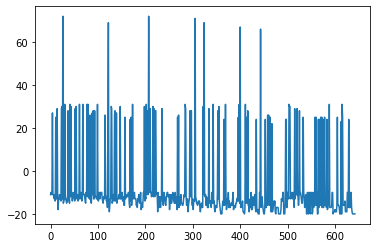

In [93]:
plt.plot(tot_reward)

In [56]:
replay_buffer

deque([(array([0, 2, 0, 0]), 2, -1.0, array([0, 1, 0, 0]), False),
       (array([0, 1, 0, 0]),
        1,
        -1.4142135623730951,
        array([1, 1, 0, 0]),
        False),
       (array([1, 1, 0, 0]), 2, -1.0, array([1, 0, 0, 0]), False),
       (array([1, 0, 0, 0]), 1, -2.0, array([2, 0, 0, 0]), False),
       (array([2, 0, 0, 0]), 3, -2.23606797749979, array([2, 1, 0, 0]), False),
       (array([2, 1, 0, 0]),
        0,
        -1.4142135623730951,
        array([1, 1, 0, 0]),
        False),
       (array([1, 1, 0, 0]), 2, -1.0, array([1, 0, 0, 0]), False),
       (array([1, 0, 0, 0]), 1, -2.0, array([2, 0, 0, 0]), False),
       (array([2, 0, 0, 0]), 3, -2.23606797749979, array([2, 1, 0, 0]), False),
       (array([2, 1, 0, 0]),
        0,
        -1.4142135623730951,
        array([1, 1, 0, 0]),
        True),
       (array([0, 2, 2, 0]), 3, -2, array([0, 2, 2, 0]), False),
       (array([0, 2, 2, 0]), 3, -2, array([0, 2, 2, 0]), False),
       (array([0, 2, 2, 0]), 3, -2

In [96]:
def play_policy(jeu,number_step):
    obs = jeu.reset()
    while jeu.time_step<=number_step:
        Q_values = model.predict(obs[np.newaxis])
        action = np.argmax(Q_values[0])
        obs, reward, done, info = jeu.move_to(action)
        print(jeu.matrice)
        print(info)
        time.sleep(0.8)
        
        
    

In [97]:
play_policy(jeu,10)

[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]
{'action': 'gauche'}
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]
{'action': 'gauche'}
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]
{'action': 'gauche'}
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]
{'action': 'gauche'}
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]
{'action': 'gauche'}
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]
{'action': 'gauche'}


KeyboardInterrupt: 

In [13]:
def render(game,playing_mode='human'):
        obs = game.reset()
        game.window = pygame.display.set_mode((size,size))
        pygame.display.set_caption("Petit jeu")
        time_step = 0
        
        running = True
        while (running) &(time_step <=15):
                game.grid(game.window, game.size, game.rows)
                game.window.fill((0, 0, 0))
                game.window.blit(game.player.image, game.player.rect)
                [game.window.blit(game.plateau.rewards[i].image_rew,game.plateau.rewards[i].rect_rew)  for i in range(game.plateau.nombre_rewards)]
                Q_values = model.predict(obs[np.newaxis])
                if game.player.done:
                    running = False
                action = np.argmax(Q_values[0])
                obs, reward, done, info = game.step(action)
                print(reward)
                print('Q_value',Q_values)
                time.sleep(0.8)
                time_step +=1
        pygame.quit()
        

In [25]:

render(game)

-20
Q_value [[-78.2668  -78.23743 -78.5069  -77.27018]]
-110
Q_value [[-80.24989  -81.134895 -80.733604 -81.55891 ]]
-110
Q_value [[-80.24989  -81.134895 -80.733604 -81.55891 ]]


In [19]:
game.player.total_reward

0